In [2]:
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt

VolumetricData = pd.read_csv(r'C:\Users\abhar\Downloads\Volumetric_RegressionDataSet.csv')
VolumetricData.shape
VolumetricData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [3]:
X = VolumetricData.drop(['Age'],axis = 1)
Y = VolumetricData.Age.values

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error  
from scipy.stats import gaussian_kde
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
pca1 = PCA(n_components=100)
pca1_data=pca1.fit_transform(X1)

labels = VolumetricData.columns.values.tolist()
label_index = [np.abs(pca1.components_[i]).argmax() for i in range(100)]
columns = [labels[label_index[i]] for i in range(100)]

pca_VolumetricData = pd.DataFrame(data=pca1_data, columns=columns)
pca_VolumetricData['Age'] = VolumetricData['Age']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_VolumetricData[columns], pca_VolumetricData['Age'], test_size=0.2)

The r^2 value of the model is 0.8411357147059393


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


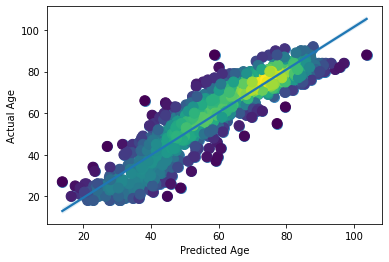

In [20]:
#Linear Regression 
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, Y_train)
Linear_Regression.predict(X_test)

r2 = metrics.r2_score(Y_test, Linear_Regression.predict(X_test))
print('The r^2 value of the model is',r2)
#sns.scatterplot(Linear_Regression.predict(X_test),Y_test)
#sns.regplot(Linear_Regression.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})

XY = np.vstack([Linear_Regression.predict(X_test),Y_test])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
sns.regplot(Linear_Regression.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(Linear_Regression.predict(X_test),Y_test, c=z, s=100)
ax.set_xlabel('Predicted Age')
ax.set_ylabel('Actual Age')
plt.show()


The testing accuracy for MLRM is:  0.8411357147059393
RMSE for Testing Data is:  8.05632740955859
The r^2 value of the model is 0.8411357147059393


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


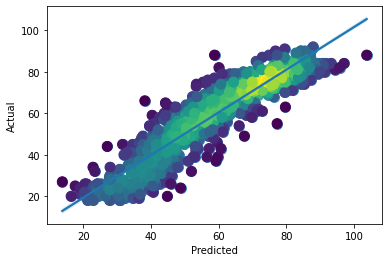

In [21]:
#Multiple Linear Regression
multiple_linear_reg = LinearRegression()
multiple_linear_reg.fit(X_train, Y_train)

y_pred_MLR_test = multiple_linear_reg.predict(X_test)

accuracy_MLR_test = r2_score(Y_test, y_pred_MLR_test)
print("The testing accuracy for MLRM is: ", accuracy_MLR_test)
RMSE_MLR_test = math.sqrt(mean_squared_error(Y_test, y_pred_MLR_test))
print("RMSE for Testing Data is: ", RMSE_MLR_test)
r2_MLR = metrics.r2_score(Y_test,y_pred_MLR_test)
print('The r^2 value of the model is',r2)

#sns.scatterplot(y_pred_MLR_test,Y_test)
#sns.regplot(y_pred_MLR_test ,Y_test, fit_reg=True, scatter_kws={"s": 100})

XY = np.vstack([y_pred_MLR_test,Y_test])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
sns.regplot(Linear_Regression.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(y_pred_MLR_test,Y_test, c=z, s=100)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

[Text(171.25896772514298, 213.0912, 'X[0] <= -0.731\nmse = 400.82\nsamples = 3380\nvalue = 58.536'),
 Text(97.40281562750629, 204.3936, 'X[0] <= -4.623\nmse = 253.831\nsamples = 1625\nvalue = 43.353'),
 Text(44.474628204478705, 195.696, 'X[134] <= -0.383\nmse = 190.825\nsamples = 951\nvalue = 36.914'),
 Text(16.778240476469094, 186.9984, 'X[8] <= -1.867\nmse = 97.097\nsamples = 429\nvalue = 29.844'),
 Text(4.18632584503766, 178.3008, 'X[153] <= 1.587\nmse = 49.747\nsamples = 131\nvalue = 25.382'),
 Text(1.7496376677160366, 169.60320000000002, 'X[41] <= -1.202\nmse = 59.894\nsamples = 71\nvalue = 28.366'),
 Text(0.6115609543081723, 160.9056, 'X[28] <= -1.495\nmse = 60.667\nsamples = 6\nvalue = 42.0'),
 Text(0.3669365725849033, 152.208, 'X[120] <= 0.117\nmse = 2.667\nsamples = 3\nvalue = 35.0'),
 Text(0.2446243817232689, 143.5104, 'X[65] <= 0.119\nmse = 1.0\nsamples = 2\nvalue = 34.0'),
 Text(0.12231219086163445, 134.81279999999998, 'mse = 0.0\nsamples = 1\nvalue = 33.0'),
 Text(0.366936

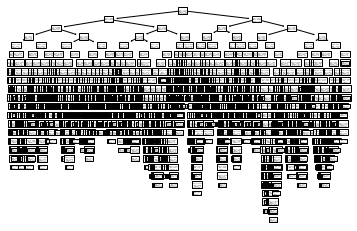

In [22]:
DTree = tree.DecisionTreeRegressor()
DTree = DTree.fit(X_train, Y_train)
tree.plot_tree(DTree)

The testing accuracy for DTree is:  0.6096320790668346


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


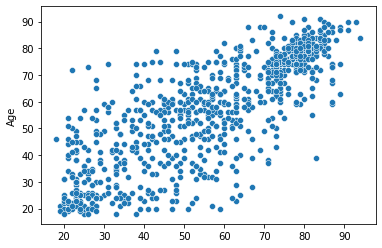

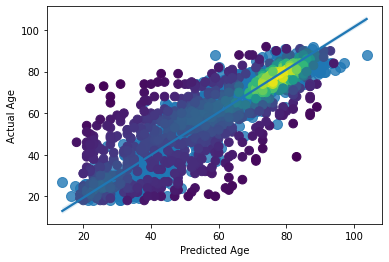

In [23]:
DTree = tree.DecisionTreeRegressor()
DTree = DTree.fit(X_train, Y_train)
DTree.predict(X_test)

accuracy_DTree_test = r2_score(Y_test, DTree.predict(X_test))
print("The testing accuracy for DTree is: ", accuracy_DTree_test)

#plt.figure(figsize=(10,10))
#sns.regplot(DTree.predict(X_test),Y_test, fit_reg=True, scatter_kws={"s": 100})

sns.scatterplot(DTree.predict(X_test),Y_test)
XY2 = np.vstack([DTree.predict(X_test),Y_test])
z = gaussian_kde(XY2)(XY2)
fig, ax = plt.subplots()

sns.regplot(Linear_Regression.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(DTree.predict(X_test),Y_test, c=z, s=75)
ax.set_xlabel('Predicted Age')
ax.set_ylabel('Actual Age')
plt.show()

Epoch 1/10
169/169 [==============================] - 1s 4ms/step - loss: 1683.1035
Epoch 2/10
169/169 [==============================] - 1s 4ms/step - loss: 570.6831
Epoch 3/10
169/169 [==============================] - 1s 4ms/step - loss: 242.1061
Epoch 4/10
169/169 [==============================] - 1s 4ms/step - loss: 86.1208
Epoch 5/10
169/169 [==============================] - 1s 4ms/step - loss: 43.9403
Epoch 6/10
169/169 [==============================] - 1s 4ms/step - loss: 28.4631
Epoch 7/10
169/169 [==============================] - 1s 4ms/step - loss: 21.1951
Epoch 8/10
169/169 [==============================] - 1s 4ms/step - loss: 15.9487
Epoch 9/10
169/169 [==============================] - 1s 4ms/step - loss: 11.8270
Epoch 10/10
169/169 [==============================] - 1s 4ms/step - loss: 9.3304
69.20378
2254    82
1296    53
3153    58
372     79
4153    80
        ..
2111    63
1589    28
2352    21
3731    31
2644    61
Name: Age, Length: 846, dtype: int64


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


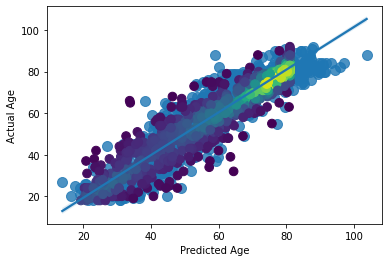

The testing accuracy for DTree is:  0.8905418507030567


In [25]:
# create ANN model
ANNmodel = Sequential()
ANNmodel.add(Dense(units=1000, kernel_initializer='normal', activation='relu'))
ANNmodel.add(Dense(units=200, kernel_initializer='normal', activation='tanh'))
ANNmodel.add(Dense(1, kernel_initializer='normal'))
ANNmodel.compile(loss='mean_squared_error', optimizer='adam')
ANNmodel.fit(X_train, Y_train ,batch_size = 20, epochs = 10, verbose=1)

model1 = [x[0] for x in ANNmodel.predict(X_test)]
print(model1[0])
print(Y_test)

#plt.figure(figsize=(10,10))
#sns.regplot(x=model1,y=Y_test, fit_reg=True, scatter_kws={"s": 100})

#sns.scatterplot(x=model1,y=Y_test)
#sns.regplot(x=model1,y=Y_test, fit_reg=True, scatter_kws={"s": 100})
XY2 = np.vstack([model1,Y_test])
z = gaussian_kde(XY2)(XY2)
fig, ax = plt.subplots()
sns.regplot(Linear_Regression.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(model1,Y_test, c=z, s=75)
ax.set_xlabel('Predicted Age')
ax.set_ylabel('Actual Age')
plt.show()

accuracy_ANN_test = r2_score(Y_test, ANNmodel.predict(X_test))
print("The testing accuracy for DTree is: ", accuracy_ANN_test)

